In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

from sklearn.preprocessing import LabelEncoder

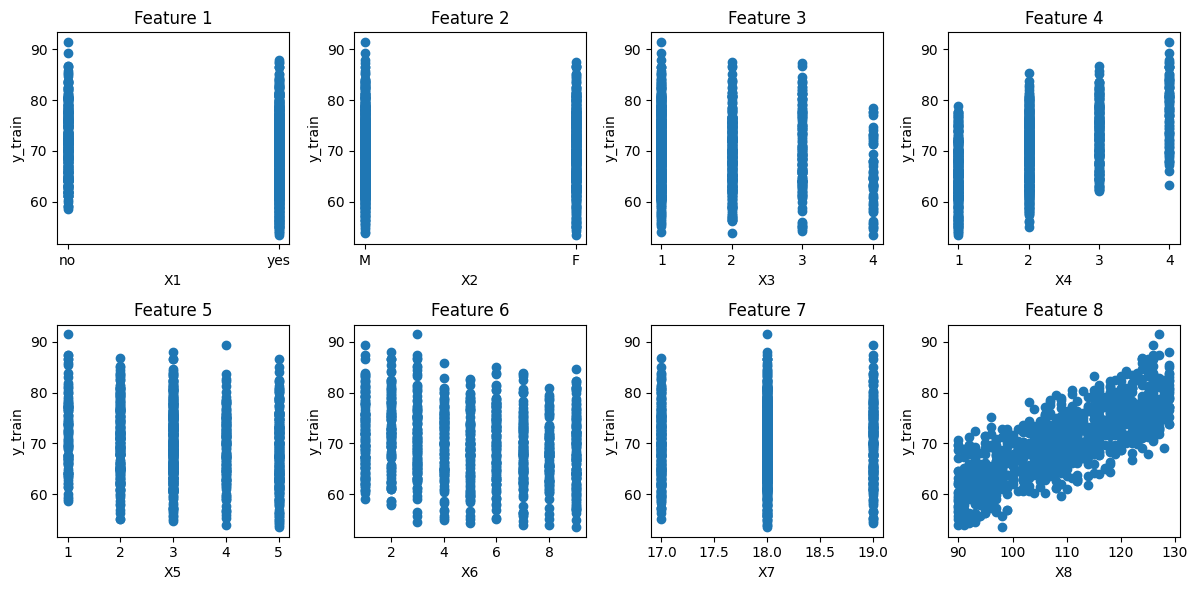

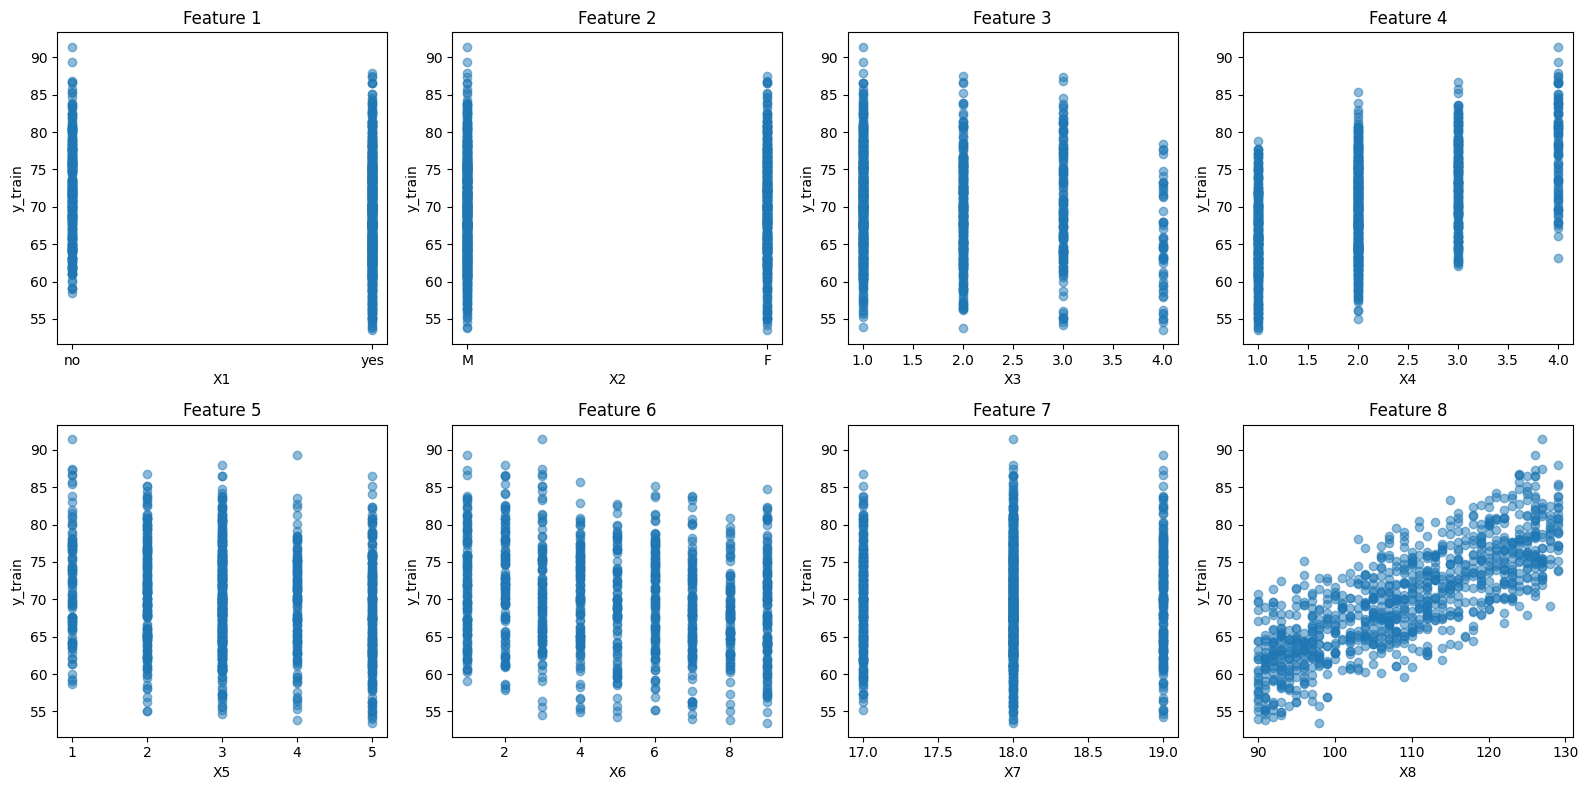

In [30]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

num_features = x_train.shape[1]

plt.figure(figsize=(12, 6))

for i in range(num_features):
    plt.subplot(2, 4, i + 1)  # Adjust subplot layout according to your number of features
    plt.scatter(x_train[:, i], y_train)
    plt.title(f'Feature {i+1}')
    plt.xlabel(f'X{i+1}')
    plt.ylabel('y_train')

plt.tight_layout()
plt.show()

# Plot y_train against each feature in x_train
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i in range(num_features):
    axes[i].scatter(x_train[:, i], y_train, alpha=0.5)
    axes[i].set_title(f'Feature {i + 1}')
    axes[i].set_xlabel(f'X{i + 1}')
    axes[i].set_ylabel('y_train')

plt.tight_layout()
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
  label_encoder = LabelEncoder()

  X = data.iloc[:, 0:8]  # Selecting only the features
  #y_train = data.iloc[:, 8].values.reshape(-1, 1)  # Assuming y_train is the last column

  x_train = pd.DataFrame(x_train, columns = X.columns)

  for col in x_train.columns:
      if x_train[col].dtype == 'object':
          x_train[col] = label_encoder.fit_transform(x_train[col])
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [31]:
def z_score(x_train):
  # ---------
  # write the code for feature scaling here
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)

  # Apply z-score normalization
  x_train = (x_train - x_mean) / x_std

  # ---------
  return x_train,x_std,x_mean

In [32]:
def cost(x_train,y_train,w,b):
  # ---------

  # Number of training examples
  m = len(y_train)

  # Calculate predictions
  y_pred = np.dot(x_train, w) + b

  # Use mean square error as cost function
  loss = np.sum((y_pred - y_train)**2) / (2 * m)

  # return cost
  # ---------

  return loss

In [33]:
def gradient_descent(x_train,y_train,w,b):
  # ---------
  m = len(y_train)
  learning_rate=0.01
  num_iterations=1000

  for _ in range(num_iterations):
      # Compute predictions
      y_pred = np.dot(x_train, w) + b

      # Compute gradients
      dw = (1 / m) * np.dot(x_train.T, (y_pred - y_train))
      db = (1 / m) * np.sum(y_pred - y_train)

      # Update parameters
      w -= learning_rate * dw
      b -= learning_rate * db
  # ---------
  return w, b

In [34]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
print("accuracy-",accuracy)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

accuracy- 100.0
Congratulations, your accuracy is 100.0%
